<a href="https://colab.research.google.com/github/Miihi77/Data-Mining-School/blob/main/Self_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Visual Library
!pip install -q seaborn

In [3]:
# Visualization imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io

# Keras API to deploy machine learning algorithms
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
from google.colab import files
uploaded = files.upload()

Saving students.csv to students.csv


In [53]:
# This read the uploaded file
uploaded_filename = next(iter(uploaded))
raw_data = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))

In [54]:
# This allows me to copy the raw data and prints out the first 5 row/column of the data set
dataset = raw_data.copy()
dataset.head()

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",...,0.00,NaN,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",...,0.00,NaN,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",...,0.00,NaN,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",...,5.89,Research,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",...,0.00,NaN,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


In [55]:
# Shows missing data using 0s and 1s or more.
# 1s or more shows missing datas and 0s shows no missing data found
dataset.isna().sum()

,0
Student ID,1
Name,0
Age,1
Gender,1
Branch,1
Average GPA,1
Backlogs,1
Attendance (%),1
Clubs,1
Skills,1


In [66]:
# Removes Missing Dataset if there are any run this
dataset = dataset.dropna()

In [57]:
# Note use axis = 1 to REMOVE COLUMNS or axis = 0 to REMOVE ROWS
dataset = dataset.drop(['Student ID', 'Name', 'Gender', 'Branch', 'Clubs', 'Skills', 'Internship Done', 'Internship Domain', 'Placement Status', 'Placement Domain', 'CTC (LPA)', 'Alumni Path'], axis=1)

In [58]:
# Show remaining data set after cleaning
dataset.head()

,Age,Average GPA,Backlogs,Attendance (%),Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,21.0,6.99,0.0,70.45,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,19.0,6.46,0.0,65.45,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,19.0,7.08,0.0,84.79,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,23.0,6.92,2.0,62.26,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,20.0,7.09,0.0,97.12,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


In [69]:
# Note can use better combination 80/20 or 70/30
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

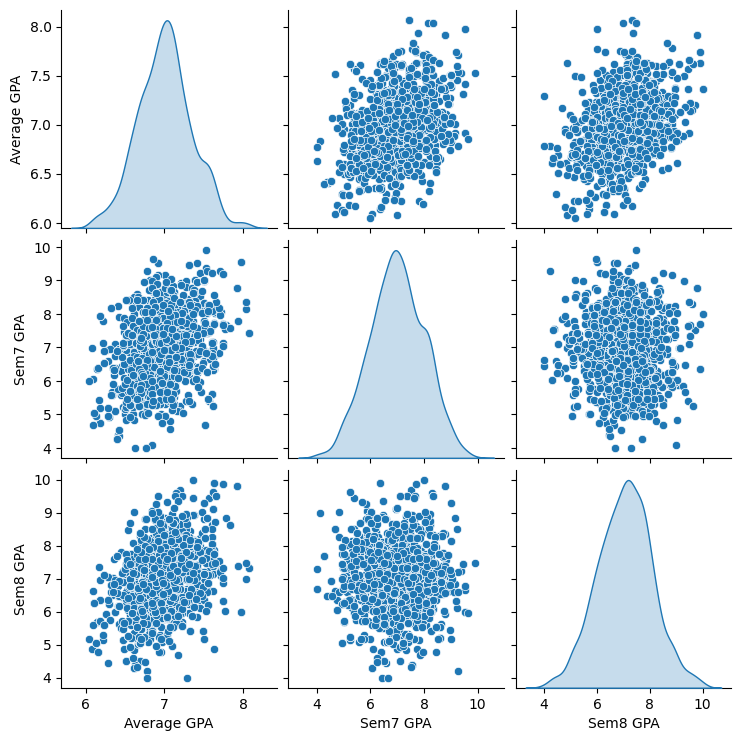

In [70]:
# Shows plot relations
sns.pairplot(train_dataset[['Average GPA', 'Sem7 GPA', 'Sem8 GPA']], diag_kind='kde')

In [71]:
# Choose the Independet Variables and Dependent Variables
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Value to be popped are two Dependet Variables
train_labels = train_features.pop('Average GPA')
test_labels = test_features.pop('Average GPA')

In [72]:
#  Allows for better representation of dataset
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [73]:
# Showcases the results of the normalization preprocessing
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Data points: ', first)
  print()
  print('Normalized:', normalizer(first).numpy())

Data points:  [[19.    1.   62.4   5.06  5.04  5.99  6.34  9.17  7.7   7.79  6.36]]

Normalized: [[-0.86  0.05 -1.4  -1.98 -1.93 -1.04 -0.64  2.2   0.79  0.79 -0.68]]


# Training The Dataset

Section for training the data set using regression models to predict data based on the chosen or given independent variable or dependent variable


In [ ]:
# NOTE WILL CHANGE THE VARIABLE NAME SOON



In [64]:
print(train_features.dtypes)

Age               float64
Backlogs          float64
Attendance (%)    float64
Sem1 GPA          float64
Sem2 GPA          float64
Sem3 GPA          float64
Sem4 GPA          float64
Sem5 GPA          float64
Sem6 GPA          float64
Sem7 GPA          float64
Sem8 GPA          float64
dtype: object
